In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install matplotlib

     |████████████████████████████████| 6.4 MB 6.3 MB/s 
     |████████████████████████████████| 63 kB 573 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=4e54f84b25ca1f33ece33def92ffe21ad643e21d3cdcf4f46bddfaa5f51d3fb4
  Stored in directory: /root/.cache/pip/wheels/4b

In [3]:
import yfinance as yf
import yahoofinancials
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np


In [6]:
data = []


stocks = ['CIPLA.NS','TATAMOTORS.NS','HDFCBANK.NS','MUTHOOTFIN.NS', 'ASIANPAINT.NS']


for t in stocks:
  data.append(yf.download(t, 
                      start='2015-04-01', 
                      end='2017-03-31'
                      ))
data = pd.concat([data[0]['Adj Close'], data[1]['Adj Close'], data[2]['Adj Close'], data[3]['Adj Close'], data[4]['Adj Close']], axis=1)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2015-04-01,689.64435,558.67896,495.67847,176.33907,783.94989
2015-04-06,714.96185,567.92004,495.05481,173.92348,786.62128
2015-04-07,707.72137,560.12311,495.43863,176.12341,796.82965
2015-04-08,715.98236,561.27271,496.78186,174.52737,807.94446
2015-04-09,699.21747,559.67334,506.64026,171.89612,813.95508
...,...,...,...,...,...
2017-03-24,580.86670,470.39999,694.08630,316.26456,1031.90503
2017-03-27,579.05737,464.75000,687.02045,316.17426,1011.20380
2017-03-28,581.06226,472.39999,692.06396,316.94193,1025.69946


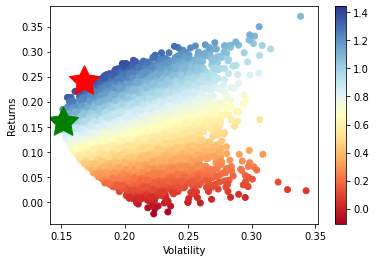

In [7]:
data.sort_index(inplace=True)


returns = data.pct_change()


mean_daily_returns = returns.mean()
cov_matrix = returns.cov()


num_portfolios = 25000


results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    
    weights = np.array(np.random.random(5))
   
    weights /= np.sum(weights)
    
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    results[2,i] = results[0,i] / results[1,i]
    
    for j in range(len(weights)):
        results[j+3,i] = weights[j]


results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]


plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)

plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)